**Disease Prediction from Medical Data**


In [ ]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/pima-data.csv')

*Feature engineering*

In [ ]:
df.shape

(768, 10)

In [ ]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [ ]:
df.isnull().count()

,0
num_preg,768
glucose_conc,768
diastolic_bp,768
thickness,768
insulin,768
bmi,768
diab_pred,768
age,768
skin,768
diabetes,768


In [ ]:
df.isnull().values.any()

np.False_

In [ ]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


<Axes: >

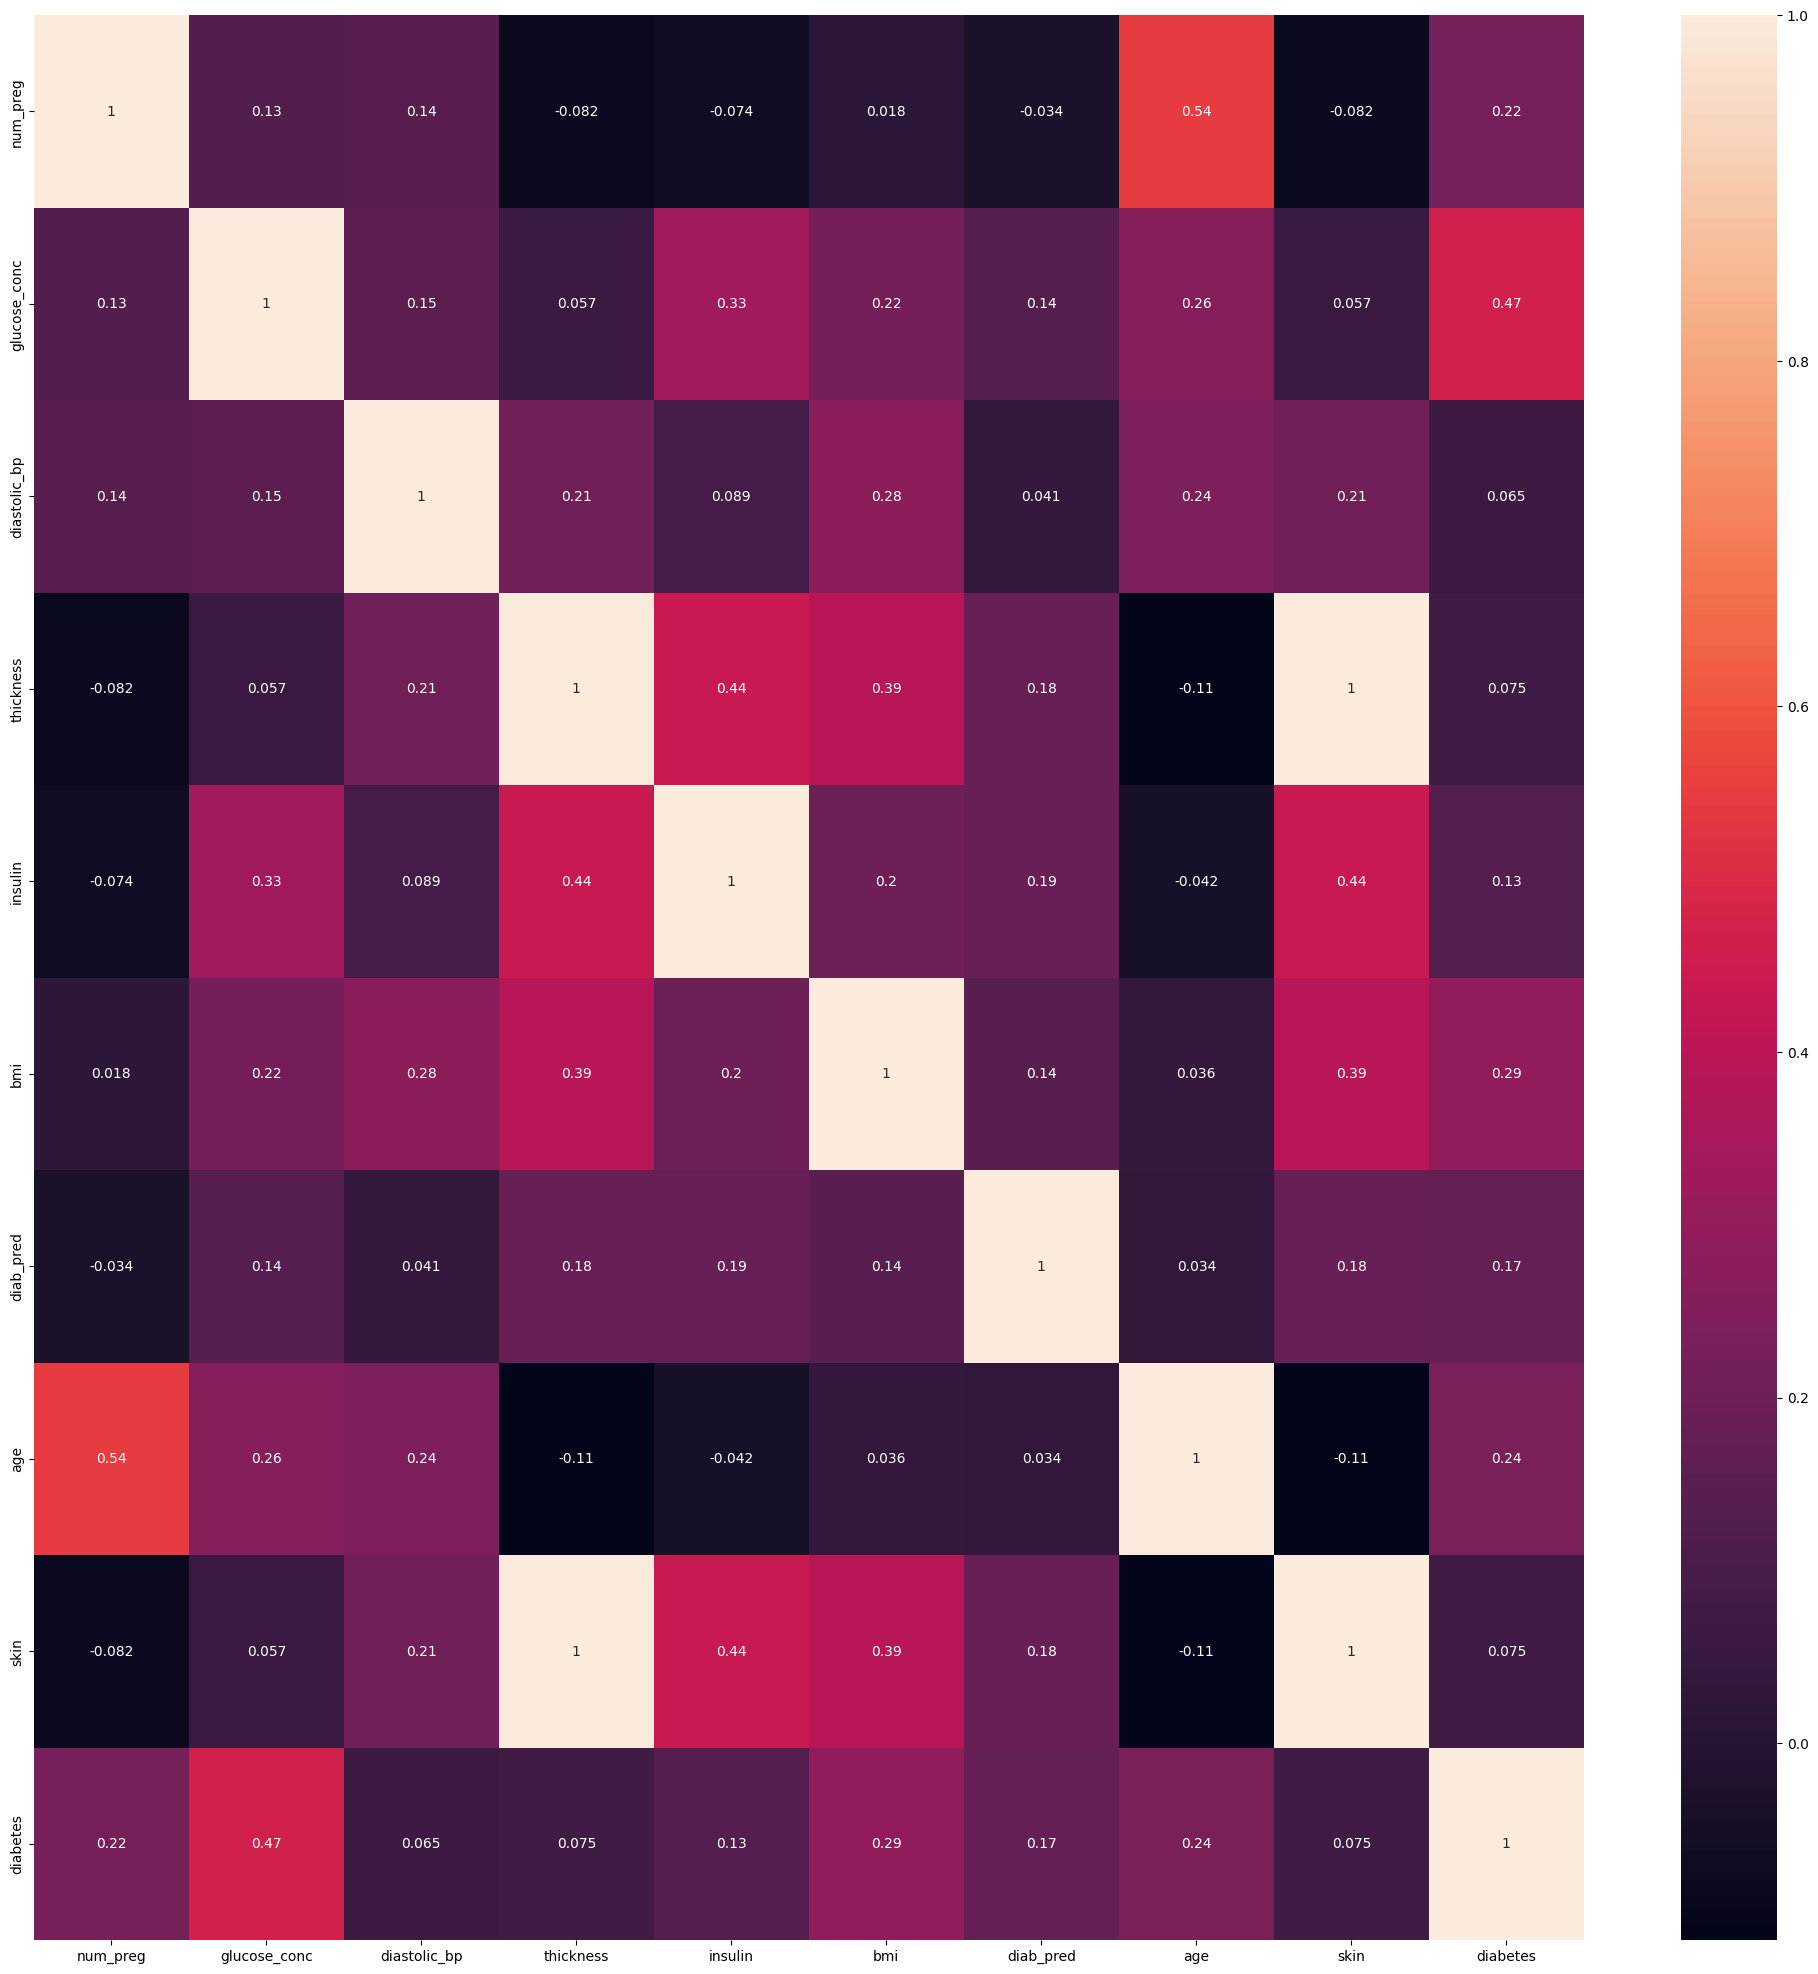

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot= True)

In [ ]:
df.corr()['diabetes']

,diabetes
num_preg,0.221898
glucose_conc,0.466581
diastolic_bp,0.065068
thickness,0.074752
insulin,0.130548
bmi,0.292695
diab_pred,0.173844
age,0.238356
skin,0.074752
diabetes,1.000000


In [ ]:
diabetes_map={True:1,False:0}

In [ ]:
df['diabetes']=df['diabetes'].map(diabetes_map)

In [ ]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


<Axes: xlabel='diabetes', ylabel='count'>

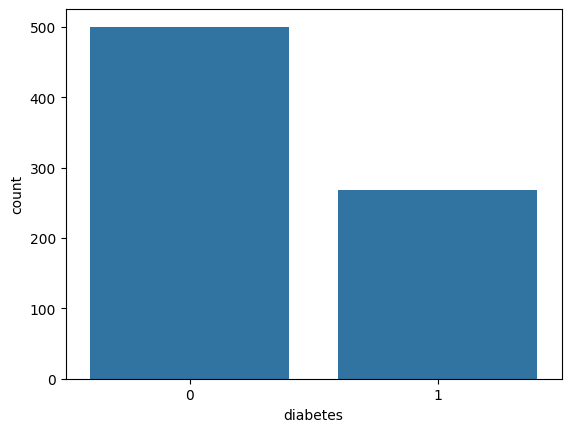

In [ ]:
sns.countplot(x='diabetes', data=df)

In [ ]:
#train test split
from sklearn.model_selection import train_test_split

X=df.drop('diabetes',axis=1)
y=df['diabetes']

In [ ]:
(X == 0).sum()

,0
num_preg,111
glucose_conc,5
diastolic_bp,35
thickness,227
insulin,374
bmi,11
diab_pred,0
age,0
skin,227


In [ ]:
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy='mean')

num_preg = X['num_preg']

X_1 = pd.DataFrame(fill_values.fit_transform(X.drop('num_preg', axis=1)),columns=X.drop('num_preg', axis=1).columns)

X = pd.concat([X_1, num_preg.reset_index(drop=True)], axis=1)

In [ ]:
#Split Dataset
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=5)

*Model Training*

In [ ]:
# Apply Algorithm
from sklearn.ensemble import RandomForestClassifier
random_forest_model= RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train,y_train.ravel())

/tmp/ipython-input-21-3199720584.py:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  random_forest_model.fit(X_train,y_train.ravel())


RandomForestClassifier(random_state=10)

In [ ]:
#Accuracy check
train_accuracy = random_forest_model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

test_accuracy = random_forest_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 1.0
Test Accuracy: 0.7748917748917749


*Hyperparameter Tuning*

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

rf = RandomForestClassifier(random_state=10)

param_dist = {'n_estimators': randint(100, 500),'max_depth': [None] + list(range(10, 50, 10)),'min_samples_split': randint(2, 11),'min_samples_leaf': randint(1, 5),'max_features': ['sqrt', 'log2', None],'bootstrap': [True, False]}

random_search = RandomizedSearchCV(estimator=rf,param_distributions=param_dist,n_iter=50,cv=5,n_jobs=-1,verbose=2,random_state=10)

random_search.fit(X_train, y_train.ravel())

print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/tmp/ipython-input-24-2546604797.py:29: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  random_search.fit(X_train, y_train.ravel())


Best parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 491}
Best score: 0.7672551055728626


*Train with best parameter*

In [ ]:
best_rf_model = RandomForestClassifier(bootstrap=True, max_depth=20, max_features='sqrt',min_samples_leaf=4,min_samples_split=2, n_estimators=491,random_state=10)
best_rf_model.fit(X_train, y_train.ravel())

/tmp/ipython-input-25-2190268697.py:13: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  best_rf_model.fit(X_train, y_train.ravel())


RandomForestClassifier(max_depth=20, min_samples_leaf=4, n_estimators=491,
                       random_state=10)

*Accuracy Check*

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test set
y_pred = best_rf_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.7748917748917749

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       160
           1       0.61      0.72      0.66        71

    accuracy                           0.77       231
   macro avg       0.74      0.76      0.75       231
weighted avg       0.79      0.77      0.78       231


Confusion Matrix:
[[128  32]
 [ 20  51]]
Test Accuracy: 0.7748917748917749
